# 链家北京二手房数据分析

## 1 导入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 
matplotlib.rcParams['font.sans-serif']=['SimHei']
lianjia_df = pd.read_csv('C:\data\lianjia.csv')

查看数据结构及各特征值的属性

In [2]:
display(lianjia_df.head(3))
lianjia_df.info()

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


该数据集总共有12个特征值，其中Id字段为该数据集的主键，我们无法从其中获取更多的信息，后续分析可将该字段删除,而Elevator字段存在大量的空值

In [3]:
lianjia_df.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


通过数据的描述性信息我们发现，Size字段最小值为2㎡，最大值为1019㎡，该字段数据不太符合常识，如为异常值将会影响我们的分析结果， 在后续处理中考虑剔除异常值的影响。

## 2 EDA

### 2.1 Size特征分析

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


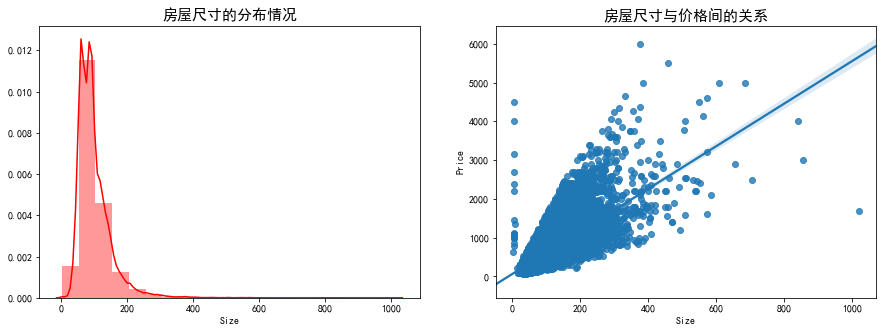

In [4]:
df=lianjia_df.copy()
f,[ax1,ax2]=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Size'],bins=20,ax=ax1,color='r')
ax1.set_title('房屋尺寸的分布情况',fontsize=15)
sns.regplot(x='Size',y='Price',data=df,ax=ax2)
ax2.set_title('房屋尺寸与价格间的关系',fontsize=15)
plt.show()

通过观察房屋尺寸和价格间的关系，我们发现Size特征基本与Price呈现线性关系，面积越大，房屋总价越高，从图中我们可以看到有两组明显的异常点：一个是面积不到10平米，但是价格却超出10000万；2.一个点面积超过了1000平米，价格却很低，这和我们在进行各大区房屋均价的箱型图分布时所观察到的现象相符

In [5]:
df.loc[df['Size']<10]

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
1168,240.97平米,长阳,毛坯,5,世茂维拉,101102253577,叠拼别墅,1080.0,房山,南北,5.0,2015
1458,242.78平米,长阳,毛坯,5,世茂维拉,101102217569,叠拼别墅,1100.0,房山,南北,5.0,2015
1797,242.96平米,长阳,精装,5,世茂维拉,101101911559,叠拼别墅,980.0,房山,南北,5.0,2015
2268,295.88平米,顺义其它,精装,4,龙湖好望山,101102431983,叠拼别墅,1000.0,顺义,南北,4.0,2014
2274,295.01平米,顺义其它,精装,4,鹭峯国际,101102300614,叠拼别墅,1450.0,顺义,南北,5.0,2014
2276,292.31平米,顺义其它,毛坯,3,龙湖好望山,101102013095,叠拼别墅,860.0,顺义,南北,4.0,2014
2432,294.42平米,顺义其它,精装,5,龙湖好望山,101101141445,叠拼别墅,980.0,顺义,南北,6.0,2013
4078,427.5平米,西红门,精装,3,鸿坤林语墅,101102023530,叠拼别墅,3150.0,大兴,南北,4.0,2015
4079,361.8平米,西红门,精装,4,鸿坤林语墅,101102460862,叠拼别墅,2380.0,大兴,南北,4.0,2015
4761,386.83平米,西红门,精装,3,鸿坤林语墅,101102411099,叠拼别墅,2700.0,大兴,南北,5.0,2015


我们发现Layout为叠拼别墅的数据由于字段结构与普通二手房不一致导致一些字段错位，且该类型房屋属于二手房中的特殊房型，可将该种类型数据删除

In [6]:
df.loc[df['Size']>1000]

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
8754,南,通州其它,有电梯,8,新华联科技大厦,101102019411,1房间0卫,1700.0,通州,简装,1019.0,2009


通过观察我们发现房屋size大于1000的数据为1房间0卫布局，应属于写字楼办公室类型，故也可将该条数据删除

In [7]:
df=df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


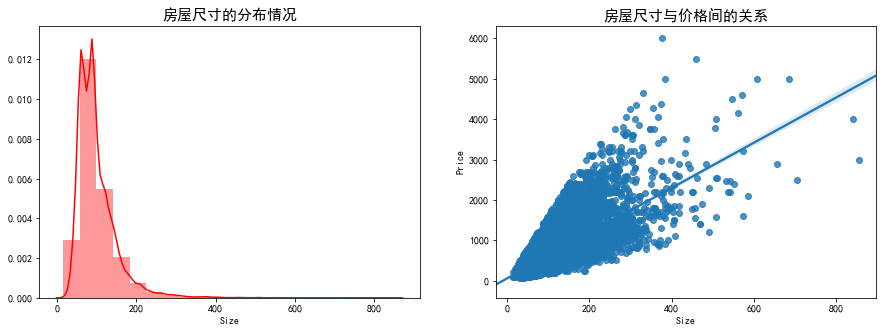

In [8]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Size'],bins=20,ax=ax1,color='r')
ax1.set_title('房屋尺寸的分布情况',fontsize=15)
sns.regplot(x='Size',y='Price',data=df,ax=ax2)
ax2.set_title('房屋尺寸与价格间的关系',fontsize=15)
plt.show()

可以看到房屋尺寸与价格间的散点图已无明显的异常值

### 2.2 Region特征分析

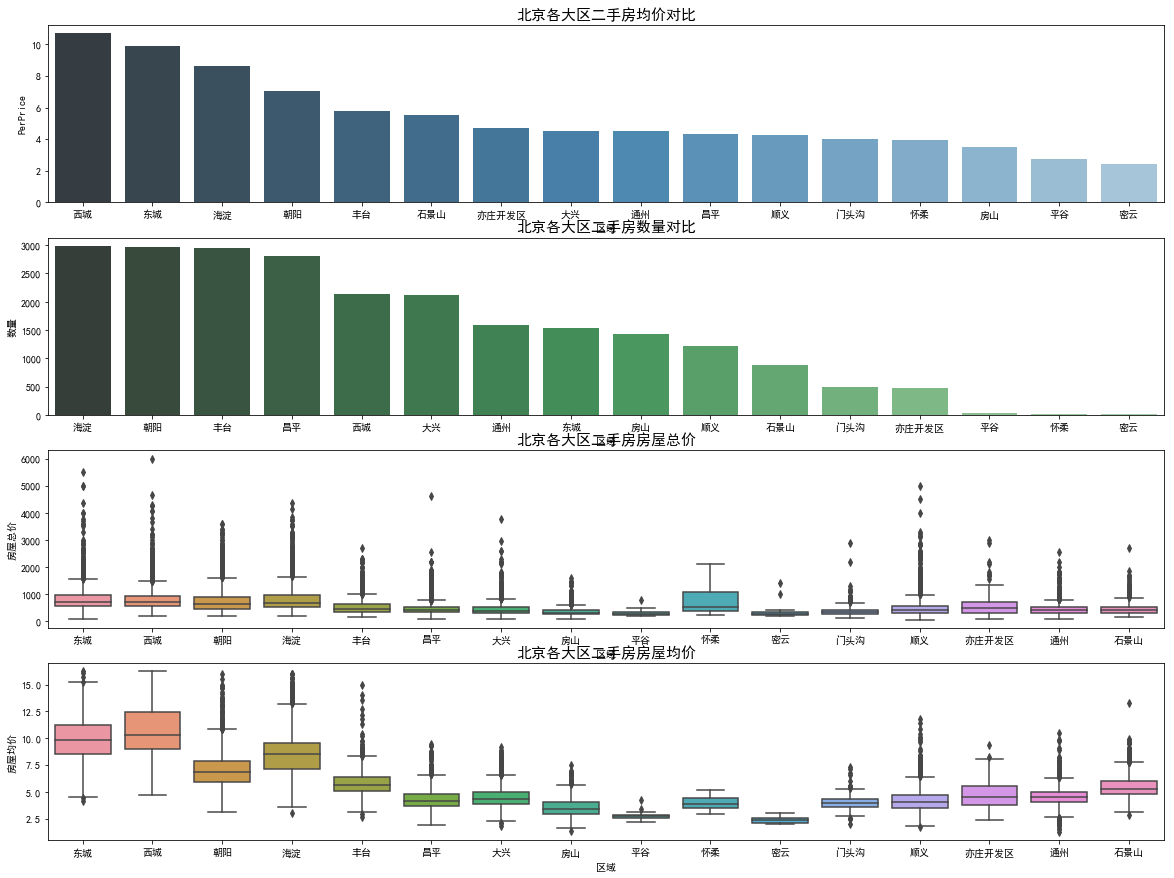

In [9]:
df['PerPrice']=df['Price']/df['Size']
df_house_count=df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean=df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()
f,[ax1,ax2,ax3,ax4]=plt.subplots(4,1,figsize=(20,15))
sns.barplot(x='Region',y='PerPrice',palette='Blues_d',data=df_house_mean,ax=ax1)
ax1.set_title('北京各大区二手房均价对比',fontsize=15)
ax1.set_xlabel('区域')
ax2.set_ylabel('每平米单价')
sns.barplot(x='Region',y='Price',palette='Greens_d',data=df_house_count,ax=ax2)
ax2.set_title('北京各大区二手房数量对比',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')
sns.boxplot(x='Region',y='Price',data=df,ax=ax3)
ax3.set_title('北京各大区二手房房屋总价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')
sns.boxplot(x='Region',y='PerPrice',data=df,ax=ax4)
ax4.set_title('北京各大区二手房房屋均价',fontsize=15)
ax4.set_xlabel('区域')
ax4.set_ylabel('房屋均价')
plt.show()

我们不仅想知道房屋总价信息还想知道房屋每平方米单价，故增加特征PerPrice,从上面三幅图我们可以看到：
二手房均价：西城区的房价均价大约为11万/平，领跑其他区，西城区位于在二环内，属于北京市中心城区，辖区内拥有许多著名中小学如北京四中等，是许多学区房的聚居地，其次是东城大约10万/平，然后是海淀大约8.5万/平，而平谷、密云区等郊区房屋均价则低于4万/平。
二手房房数量：从数量统计上来看，目前二手房数量较多的区域依次为海淀、朝阳、丰台。我们可以看到昌平区二手房供应总量也比较多，主要原因为许多高校在昌平区设置新校区，再加上地铁线路的拉通，也促进了昌平区的发展。
二手房总价：通过房屋总价的箱型图分布，各大区域房屋总价中位数都在1000万以下，且房屋总价离散程度较高，西城最高达到了6000万
二手房均价：通过房屋均价的箱型图分布，各大区域房屋均价离散程度分布不均，有的离散程度较高，有的离散程度较低。

### 2.3 Layout特征分析

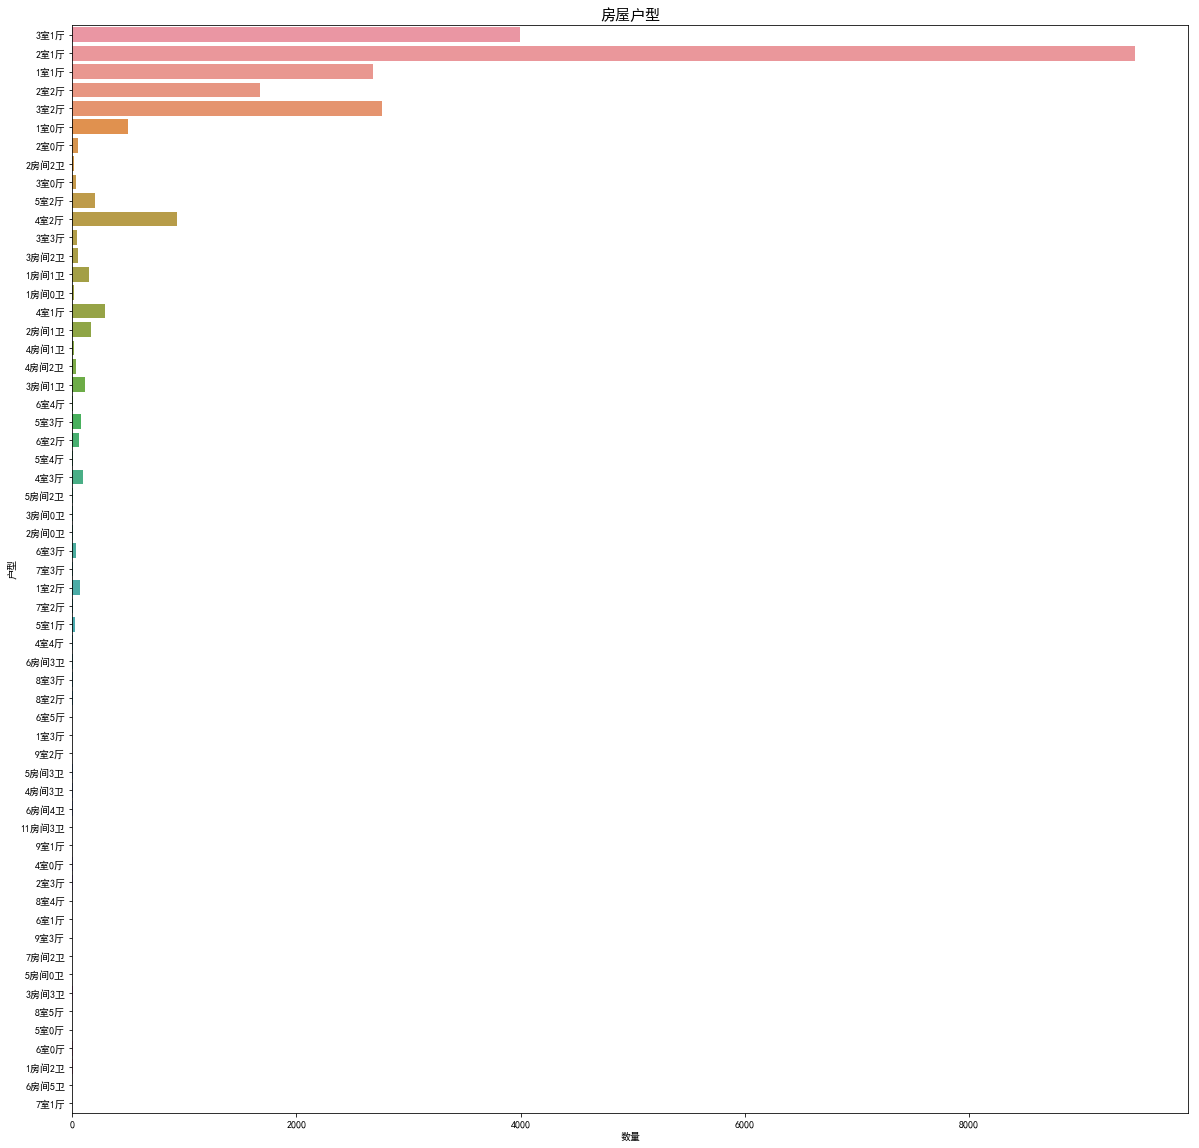

In [10]:
f,ax1=plt.subplots(figsize=(20,20))
sns.countplot(y='Layout',data=df,ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

In [11]:
df['Layout'].value_counts()

2室1厅      9485
3室1厅      3999
3室2厅      2765
1室1厅      2681
2室2厅      1671
4室2厅       930
1室0厅       499
4室1厅       295
5室2厅       200
2房间1卫      170
1房间1卫      146
3房间1卫      116
4室3厅        96
5室3厅        75
1室2厅        67
6室2厅        59
3房间2卫       53
2室0厅        50
3室3厅        43
4房间2卫       31
6室3厅        29
3室0厅        29
5室1厅        27
2房间2卫       18
4房间1卫       15
1房间0卫       14
5房间2卫       10
7室3厅         7
4房间3卫        7
7室2厅         6
5房间3卫        6
2室3厅         5
5室4厅         4
6室4厅         4
4室4厅         4
8室3厅         4
4室0厅         3
3房间0卫        3
6房间4卫        3
8室2厅         3
6房间3卫        2
2房间0卫        2
1房间2卫        2
6室0厅         2
3房间3卫        2
6房间5卫        1
7房间2卫        1
8室5厅         1
5房间0卫        1
8室4厅         1
6室1厅         1
9室2厅         1
7室1厅         1
5室0厅         1
1室3厅         1
11房间3卫       1
6室5厅         1
9室1厅         1
9室3厅         1
Name: Layout, dtype: int64

Layout字段存在很多非常规的数据，我们只保留几室几厅这种格式，将其他数据删除

In [12]:
df = df.loc[(df['Layout'].str.extract('^\d(.*?)\d.*?') == '室')[0]]

由于房屋户型这种分类指标不太利于后续建模时模型的运行，故我们单独提取出该字段的室和厅作为新的字段

In [13]:
df['num_room']=df['Layout'].map(lambda x: x[0:1])

In [14]:
df['num_hall']=df['Layout'].map(lambda x: x[2:3])

### 2.4 Renovation特征分析

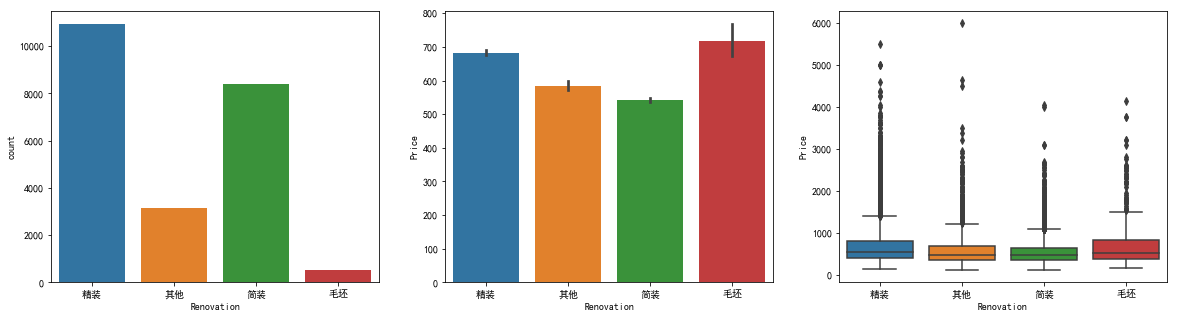

In [15]:
f,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='Renovation',data=df,ax=ax1)
sns.barplot(x='Renovation',y='Price',data=df,ax=ax2)
sns.boxplot(x='Renovation',y='Price',data=df,ax=ax3)
plt.show()

从上图我们可以看到：从房屋数量来看，精装修二手房数量最多，毛坯房最少；从房屋总价均值来看，毛坯房的房屋总价均值反而更高，我们再来看一下房屋单价的情况

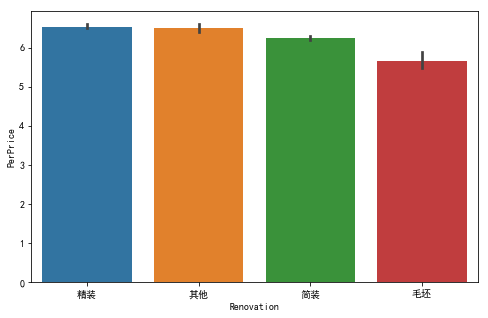

In [16]:
f,ax1=plt.subplots(figsize=(8,5))
sns.barplot(x='Renovation',y='PerPrice',data=df,ax=ax1)
plt.show()

从上图我们可以看到房屋单价的均值毛坯房则为最低了，比较符合现实情况

### 2.5 Elevator特征分析

我们从前述分析中发现Elevator特征有许多的缺失值，如果删掉这些字段将影响我们的样本数据，所以我们考虑填补该部分缺失值，根据1999年6月1日起实行的国家标准《住宅设计规范》规定七层及七层以上住宅需设置电梯，我们按照这一规则来填补缺失值

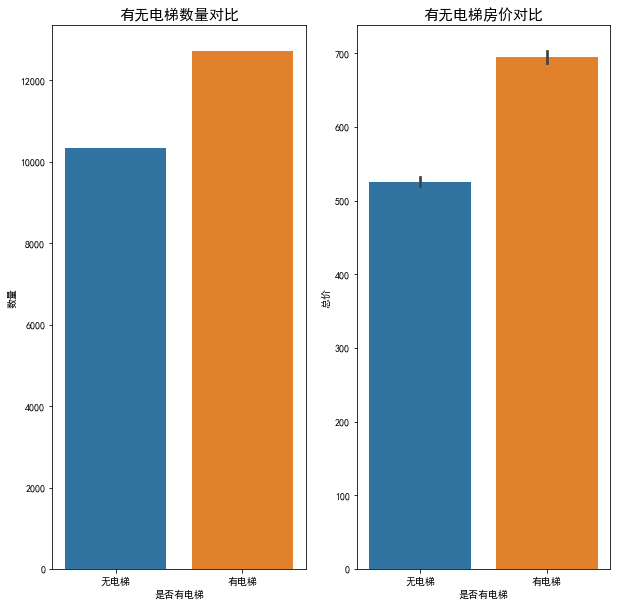

In [17]:
df.loc[(df['Floor']>6)&(df['Elevator'].isnull()&(df['Year']>1999)),'Elevator']='有电梯'
df.loc[(df['Floor']<=6)&(df['Elevator'].isnull()&(df['Year']>1999)),'Elevator']='无电梯'
df.loc[(df['Elevator'].isnull()&(df['Year']<=1999)),'Elevator']='无电梯'
f,[ax1,ax2]=plt.subplots(1,2,figsize=(10,10))
sns.countplot(df['Elevator'],ax=ax1)
ax1.set_title('有无电梯数量对比',fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')
sns.barplot(x='Elevator',y='Price',data=df,ax=ax2)
ax2.set_title('有无电梯房价对比',fontsize=15)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')
plt.show()

从上图我们可以看到，在数量上有电梯的房源数量要高于无电梯的房源，从房屋总价平均值来看有电梯的房源价格要高于无电梯房源

### 2.6 Year特征分析

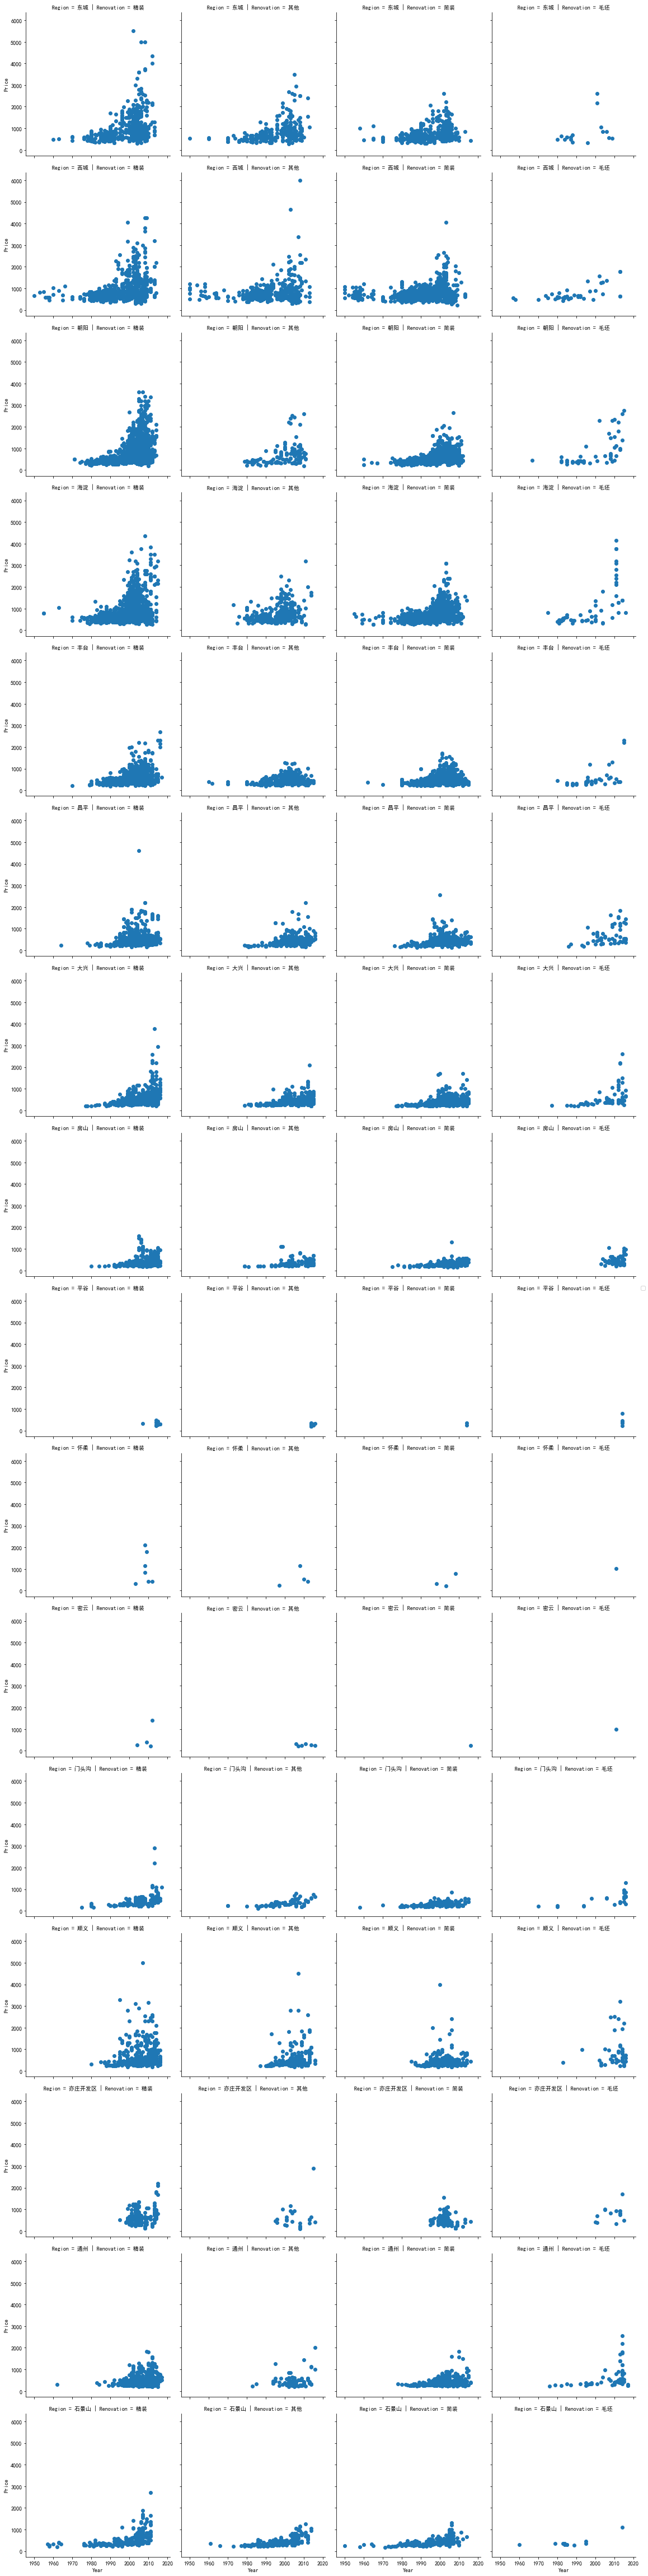

In [18]:
grid = sns.FacetGrid(df, row='Region', col='Renovation', palette='seismic',size=4)
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()

我们可以看到各区的二手房房源价格随着时间的增长都呈现增长的趋势，从数量上来说各区房源建设时间均集中在2000年以后

### 2.7 Floor特征分析

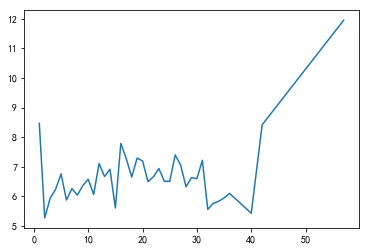

In [19]:
df_floor_mean=df.groupby('Floor')['PerPrice'].mean().to_frame().reset_index()
df_floor_mean.sort_values(by='Floor')
plt.plot(df_floor_mean['Floor'],df_floor_mean['PerPrice'])
plt.show()

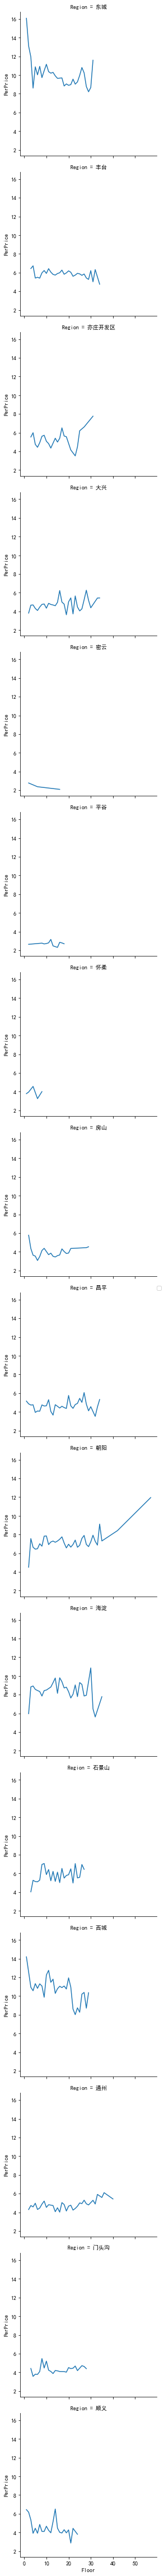

In [20]:
df_region_floor_mean=df.groupby(['Region','Floor'])['PerPrice'].mean().to_frame().reset_index()
df_region_floor_mean.sort_values(by='Floor')
grid1= sns.FacetGrid(df_region_floor_mean, row='Region', palette='seismic',size=4)
grid1.map(plt.plot, 'Floor', 'PerPrice')
grid1.add_legend()

房屋楼层对房价的影响是多方面的，从上面的两幅图中没有体现出一个较为一致的趋势

### 2.8 特征属性转化

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23052 entries, 0 to 23676
Data columns (total 15 columns):
Direction     23052 non-null object
District      23052 non-null object
Elevator      23052 non-null object
Floor         23052 non-null int64
Garden        23052 non-null object
Id            23052 non-null int64
Layout        23052 non-null object
Price         23052 non-null float64
Region        23052 non-null object
Renovation    23052 non-null object
Size          23052 non-null float64
Year          23052 non-null int64
PerPrice      23052 non-null float64
num_room      23052 non-null object
num_hall      23052 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 3.4+ MB


我们观察到Elevator、Region等属于分类特征，我们需要将其转化为模型可以读取的数值型特征

In [22]:
from sklearn.preprocessing import LabelEncoder
Elevator_le = LabelEncoder()
Region_le = LabelEncoder()
Renovation_le = LabelEncoder()
df['Elevator'] = Elevator_le.fit_transform(df['Elevator'].values)
df['Region'] =Region_le.fit_transform(df['Region'].values)
df['Renovation'] =Renovation_le.fit_transform(df['Renovation'].values)
df['num_room'] =df['num_room'].astype(int)
df['num_hall'] =df['num_hall'].astype(int)


In [23]:
display(df.head(3))

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year,PerPrice,num_room,num_hall
0,东西,灯市口,0,6,锡拉胡同21号院,101102647043,3室1厅,780.0,0,3,75.0,1988,10.400000,3,1
1,南北,东单,0,6,东华门大街,101102650978,2室1厅,705.0,0,3,60.0,1988,11.750000,2,1
2,南西,崇文门,1,16,新世界中心,101102672743,3室1厅,1400.0,0,0,210.0,1996,6.666667,3,1


将不纳入模型的特征值删除

In [24]:
df=df.drop(['Direction','District','Garden','Id','Layout','PerPrice'],axis=1)

### 2.9 特征相关性

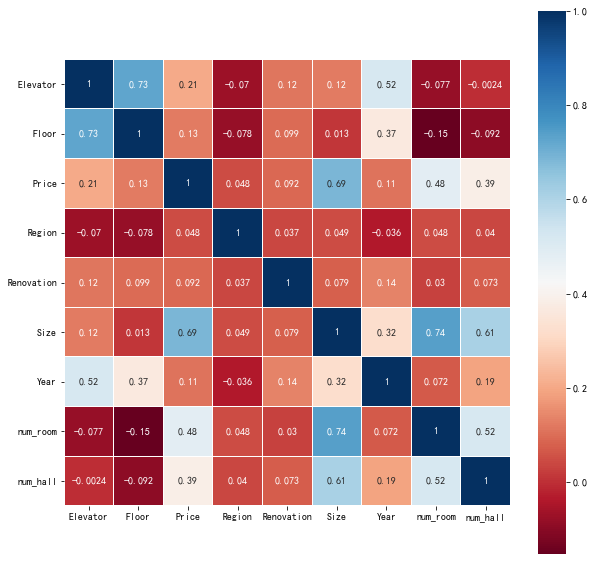

In [25]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## 3 模型预测

### 3.1 构造训练集，测试集

In [26]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3 , random_state=100)
train_labels = train_set.pop('Price')
test_labels = test_set.pop('Price')

### 3.2 训练简单线性回归模型

In [27]:
from sklearn.linear_model import LinearRegression
model_linear_regression = LinearRegression()
model_linear_regression.fit(train_set,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 3.3 训练GBDT模型

In [28]:
from sklearn import ensemble
model_gradient_boosting_regressor = ensemble.GradientBoostingRegressor(n_estimators=100)
model_gradient_boosting_regressor.fit(train_set,train_labels)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

### 3.4 模型性能评估(采用RMSE)

In [29]:
from sklearn.metrics import mean_squared_error
test_set_pred_by_lr = model_linear_regression.predict(test_set)
test_set_pred_by_gbdt = model_gradient_boosting_regressor.predict(test_set)
print('逻辑回归RMSE：',np.sqrt(mean_squared_error(test_labels,test_set_pred_by_lr)))
print('GBDT模型RMSE：',np.sqrt(mean_squared_error(test_labels,test_set_pred_by_gbdt)))

逻辑回归RMSE： 282.2705347354141
GBDT模型RMSE： 181.94863510496444


### 3.5 可视化误差

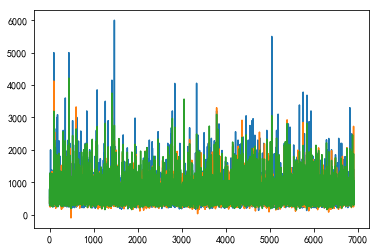

In [30]:
x_data = range(len(test_labels))
plt.plot(x_data,test_labels)
plt.plot(x_data,test_set_pred_by_lr)
plt.plot(x_data,test_set_pred_by_gbdt)
plt.show()

选取前50个样本进行可视化

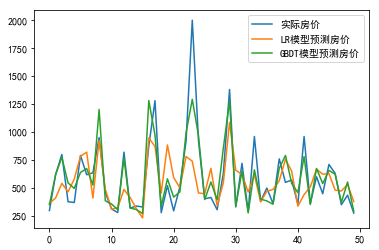

In [31]:
x_data = range(len(test_labels[0:50]))
plt.plot(x_data,test_labels[0:50])
plt.plot(x_data,test_set_pred_by_lr[0:50])
plt.plot(x_data,test_set_pred_by_gbdt[0:50])
plt.legend(['实际房价', 'LR模型预测房价', 'GBDT模型预测房价'])  
plt.show()

从RMSE评价结果来看，GBDT模型表现比LR要好，原因主要为GBDT是集成树模型，能够拟合非线性数据，而LR是线性模型，从拟合性能上来说GBDT模型更好。